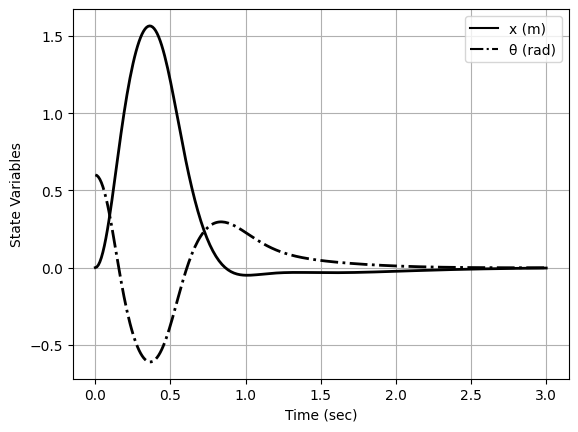

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def inverted_pendulum_k2(t, x):
    # Constants
    g = 9.8
    l = 1
    m = 1
    M = 1

    # State feedback gains
    k = np.array([-40.0000, -37.3693, -190.6669, -54.7283])

    # Intermediate calculations
    d1 = M + m * (1 - np.cos(x[2]) ** 2)
    d2 = l * d1

    # State feedback
    F = -np.dot(k, x)

    # State derivatives
    xp = np.zeros(4)
    xp[0] = x[1]
    xp[1] = (F + m * l * x[3] ** 2 * np.sin(x[2]) - m * g * np.sin(x[2]) * np.cos(x[2])) / d1
    xp[2] = x[3]
    xp[3] = (-F * np.cos(x[2]) - m * l * x[3] ** 2 * np.sin(x[2]) * np.cos(x[2]) + (M + m) * g * np.sin(x[2])) / d2

    return xp

# Initial conditions: [x, v, theta, omega]
x0 = [0, 0, 0.6, 0]

# Time span
t_span = (0, 3)
t_eval = np.linspace(t_span[0], t_span[1], 300)  # 300 points within 3 seconds

# Solve the ODE
sol = solve_ivp(inverted_pendulum_k2, t_span, x0, t_eval=t_eval, max_step=1e-2)

# Plotting
plt.plot(sol.t, sol.y[0], 'k', label='x (m)')
plt.plot(sol.t, sol.y[2], '-.k', label='θ (rad)')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('State Variables')
plt.legend()
plt.gca().set_prop_cycle(None)  # Reset the color cycle
for line in plt.gca().get_lines():
    line.set_linewidth(2)
plt.show()
